In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('datasets/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [17]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df = df[df['Year_of_Release']<2017]
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000,7983.000000,7463.000000,7463.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,0.536361,68.994363,26.441313,7.126330,163.015141
std,5.877050,0.818416,0.506696,0.311082,0.187994,1.558610,13.920060,19.008136,1.499447,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [19]:
na_sales = df['NA_Sales'].groupby(df.Year_of_Release).agg('sum').reset_index()
eu_sales = df['EU_Sales'].groupby(df.Year_of_Release).agg('sum').reset_index()
jp_sales = df['JP_Sales'].groupby(df.Year_of_Release).agg('sum').reset_index()
other_sales = df['Other_Sales'].groupby(df.Year_of_Release).agg('sum').reset_index()
total_sales = df['Global_Sales'].groupby(df.Year_of_Release).agg('sum').reset_index()


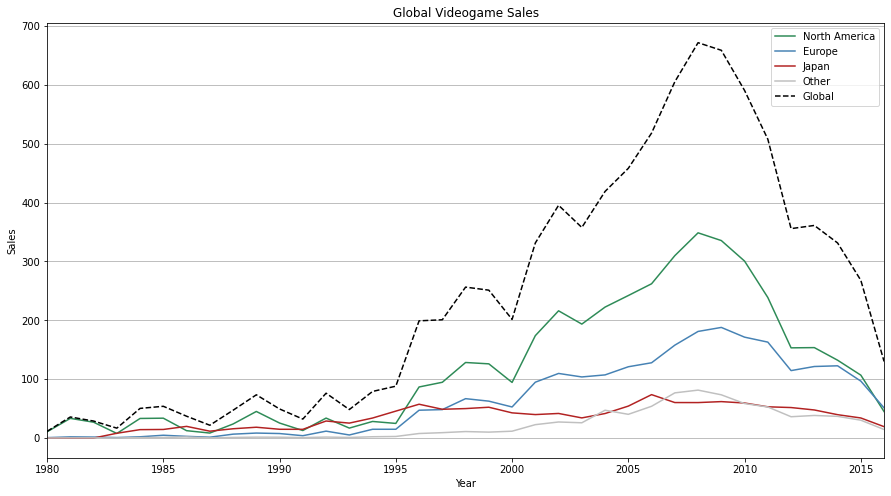

In [22]:
plt.figure(figsize=(15,8))

plt.plot(na_sales.Year_of_Release,na_sales.NA_Sales, color='seagreen', label='North America')
plt.plot(eu_sales.Year_of_Release,eu_sales.EU_Sales, color='steelblue', label = 'Europe')
plt.plot(jp_sales.Year_of_Release, jp_sales.JP_Sales, color = 'firebrick', label= 'Japan')
plt.plot(other_sales.Year_of_Release, other_sales.Other_Sales, color = 'silver', label='Other')
plt.plot(total_sales.Year_of_Release, total_sales.Global_Sales, color = 'black', ls='--', label = 'Global')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.xlim(1980,2016)
plt.grid(b=None, which='major', axis='y')
plt.title("Global Videogame Sales")
plt.legend()

plt.show()

In [47]:
top_10_games = df.groupby(df.Name).agg('sum').reset_index().sort_values(by=['Global_Sales'], ascending=False)

top_10_games = top_10_games[top_10_games.Year_of_Release>2014]

top_10_games = top_10_games[['Name','Other_Sales','EU_Sales','JP_Sales', 'NA_Sales']].head(20)

top_10_games


,Name,Other_Sales,EU_Sales,JP_Sales,NA_Sales
3694,Grand Theft Auto V,7.90,23.42,1.42,23.84
9288,Super Mario Bros.,0.99,4.88,6.96,32.48
9671,Tetris,0.69,2.95,6.03,26.17
1232,Call of Duty: Modern Warfare 3,3.29,11.15,0.62,15.54
1227,Call of Duty: Black Ops II,3.76,10.84,0.72,14.08
1225,Call of Duty: Black Ops,3.08,8.54,0.59,16.99
1229,Call of Duty: Ghosts,3.08,8.89,0.48,14.94
9302,Super Mario World,0.75,4.86,4.49,15.99
1226,Call of Duty: Black Ops 3,3.49,9.49,0.44,12.25
1231,Call of Duty: Modern Warfare 2,2.97,8.02,0.46,13.52


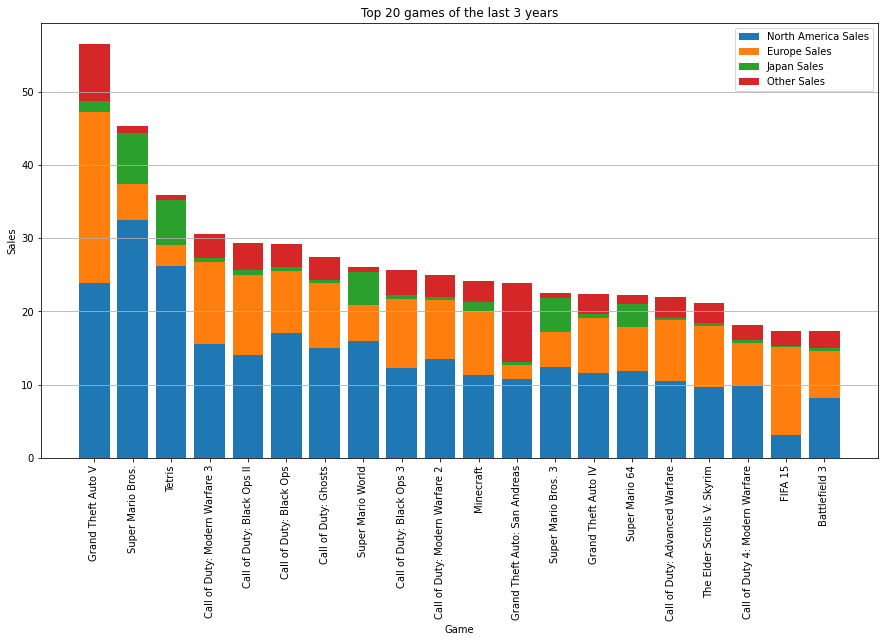

In [58]:
plt.figure(figsize=(15,8))

NA_Sales = top_10_games.NA_Sales
EU_Sales = top_10_games.EU_Sales
JP_Sales = top_10_games.JP_Sales
Other_Sales = top_10_games.Other_Sales
games = top_10_games.Name

plt.bar(games, NA_Sales, label= 'North America Sales')
plt.bar(games,EU_Sales, bottom=NA_Sales, label='Europe Sales')
plt.bar(games, JP_Sales, bottom=(NA_Sales+EU_Sales), label='Japan Sales')
plt.bar(games, Other_Sales, bottom=(NA_Sales+EU_Sales+JP_Sales), label='Other Sales')

plt.xlabel('Game')
plt.ylabel('Sales')
plt.grid(b=None, which='major', axis='y')
plt.title("Top 20 games of the last 3 years")
plt.legend()
plt.xticks(rotation=90)

plt.show()

In [63]:
launches_by_platform = df['Name'].groupby(df.Platform).agg('count').reset_index()

sales_by_platform = df['Global_Sales'].groupby(df.Platform).agg('sum').reset_index()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0                b
1                g
2                r
3                c
4                m
5                y
6                k
7                w
8         tab:blue
9       tab:orange
10       tab:green
11         tab:red
12      tab:purple
13       tab:brown
14        tab:pink
15        tab:gray
16       tab:olive
17        tab:cyan
18    midnightblue
19       royalblue
20          orange
21      blueviolet
22           azure
23       goldenrod
24       rosybrown
25            gold
26      whitesmoke
27            aqua
28            lime
29       darksamon
30       lawngreen
Name: Platform, dtype: object

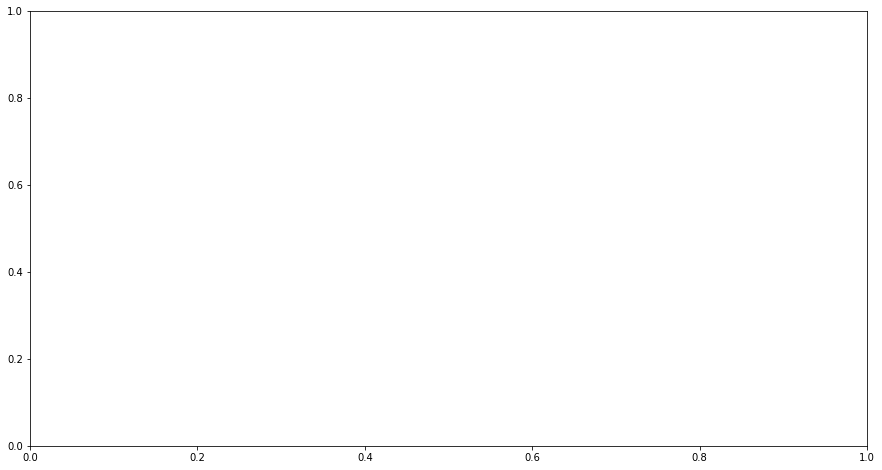

In [77]:
plt.figure(figsize=(15,8))

colors = {'2600':'b', '3DO':'g', '3DS':'r', 'DC':'c', 'DS':'m', 'GB':'y', 'GBA':'k', 'GC':'w', 'GEN':'tab:blue', 
          'GG':'tab:orange','N64':'tab:green', 'NES':'tab:red', 'NG':'tab:purple', 'PC':'tab:brown', 'PCFX':'tab:pink',
          'PS':'tab:gray', 'PS2':'tab:olive', 'PS3':'tab:cyan', 'PS4':'midnightblue', 'PSP':'royalblue','PSV':'orange', 
          'SAT':'blueviolet', 'SCD':'azure', 'SNES':'goldenrod', 'TG16':'rosybrown', 'WS':'gold', 'Wii':'whitesmoke', 
          'WiiU':'aqua', 'X360':'lime','XB':'darksamon', 'XOne':'lawngreen'}

plt.scatter(launches_by_platform['Name'],sales_by_platform['Global_Sales'], 200,c=sales_by_platform.Platform.map(colors))

plt.show()

/Users/miguel.d.ferrusca/Documents/ironhack/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Name', ylabel='Global_Sales'>

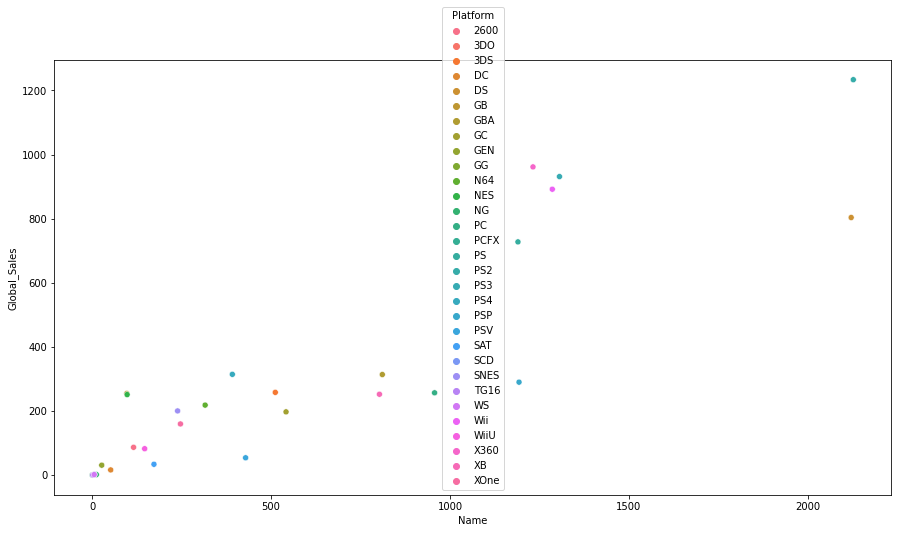

In [83]:
plt.figure(figsize=(15,8))


sns.scatterplot(launches_by_platform['Name'],sales_by_platform['Global_Sales'], launches_by_platform['Platform'], legend='auto')